<a href="https://colab.research.google.com/github/luiz-star/Aprendizado_Maquina_Classificacao/blob/main/Aprendizado_M%C3%A1quinas_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificacão  no scikit-learn

In [15]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# Leitura de dados csv
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [9]:
# extração de x e y
x, y = df[['temperatura']].values, df[['classification']].values
print('x:\n', x)
print('y:\n', y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [5]:
# pré processamento
LabelEncoder?

In [10]:
# conversão de y para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y.ravel())
print('y:\n', y)


y:
 [3 2 3 3 0 1]


In [11]:
# modelo
from sklearn.linear_model import LogisticRegression

In [12]:
# classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# gerando 100 valores de temperatura
# linearmente espaçados entre 0 e 45
# predição em novos valores de temperatura

x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)

#predição desses valores
y_pred = clf.predict(x_test)

In [17]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
# conversão de y_pred para os valores originais
y_pred = le.inverse_transform(y_pred)


In [19]:
# Output
output = {'new_temp' : x_test.ravel(),
         'new_class' : y_pred.ravel() }
output = pd.DataFrame(output)         

In [20]:
# estatisticas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [21]:
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


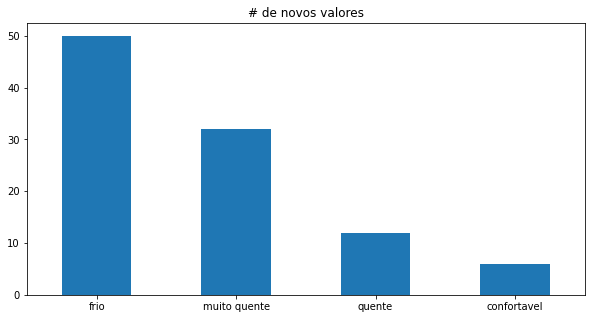

In [24]:
# contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10, 5),
                                            rot=0,
                                            title='# de novos valores');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


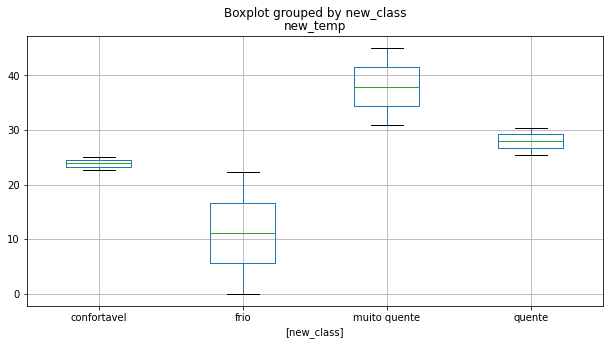

In [26]:
# distribuição do output produzido
# conseguimos inferir a classificação novas temperaturas
# a partir de um dataset com 6 exemplos
output.boxplot(by='new_class', figsize=(10, 5));

In [27]:
# sistema automático
def classify_temp():
  """Classifica o imput do usuário."""

  ask = True
  while ask:
    # input de temperatura
    temp = input('Insira a temperatura (graus Celsius):')


    # tranforma para numpy array
    temp = np.array(float(temp)).reshape(-1, 1)

    # realiza classificação
    class_temp = clf.predict(temp)

    # transformação inversa para retornar a string original
    class_temp = le.inverse_transform(class_temp)


    # classificação
    print(f'A Classificação da temperatura {temp.ravel()[0]} é:', class_temp[0])

    # perguntar
    ask = input('Nova classificação (y/n): ') == 'y'

In [ ]:
# rodando o programa / Emulador de temperatura com poucas amostras
classify_temp()


Insira a temperatura (graus Celsius):5
A Classificação da temperatura 5.0 é: frio
Nova classificação (y/n): y
Insira a temperatura (graus Celsius):22.5
A Classificação da temperatura 22.5 é: confortavel
Nova classificação (y/n): y
Insira a temperatura (graus Celsius):27.111148
A Classificação da temperatura 27.111148 é: quente
